### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import set_config
import seaborn as sns

In [2]:
print(pd.__version__)

1.3.4


In [3]:
df = pd.read_csv('data/winequality-red.csv', sep = ',')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
set_config(display="diagram")

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

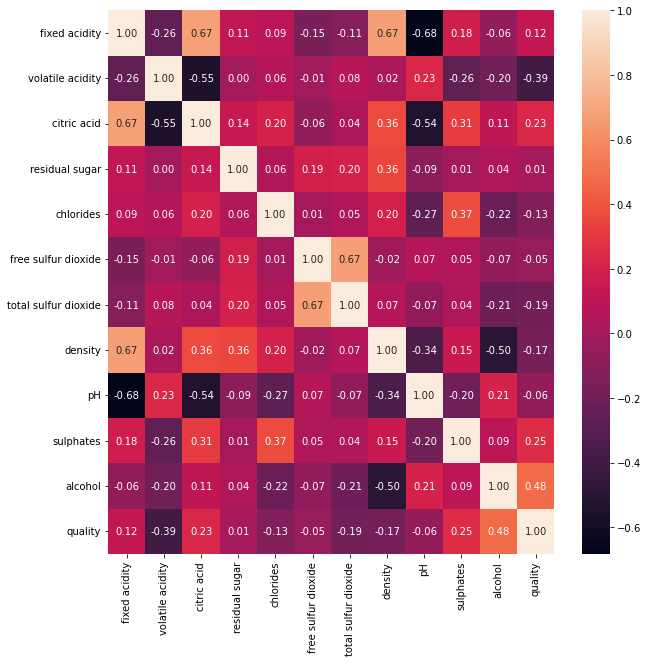

In [8]:
#heatmap
plt.tight_layout()
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [9]:
X = df.drop('quality', axis = 1)
y = df['quality']

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

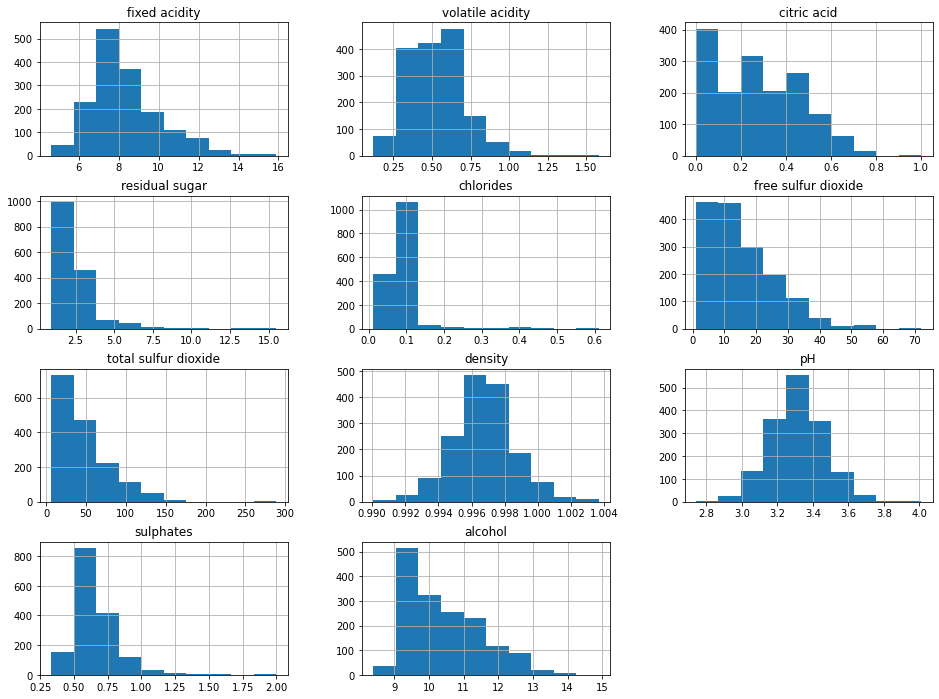

In [10]:
X.hist(figsize = (16, 12))

<AxesSubplot:>

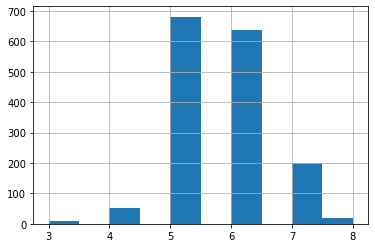

In [11]:
y.hist()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [13]:
# check plynomial degrees
# Evaluate holdout method
train_mses = []
test_mses = []

for d in range(1,11):

    #create pipeline with PolynomialFeatures and LinearRegression
    #remember to set include_bias = False
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = d, include_bias = False)),
                     ('quad_model', LinearRegression())])
    #fit pipeline on training data
    pipe.fit(X_train, y_train)
    
    #mse of training data
    train_mse = mean_squared_error(y_train, pipe.predict(X_train))
    train_mses.append(train_mse)
    #mse of testing data
    test_mse = mean_squared_error(y_test, pipe.predict(X_test))
    test_mses.append(test_mse)

best_model_complexity = test_mses.index(min(test_mses)) + 1
print(best_model_complexity)

2


In [14]:
# check results
test_mses

[0.3883017386868917,
 0.38695874357406895,
 0.7370097008403627,
 253221.87965499726,
 1161748.6958639594,
 287736933.3476724,
 3319269718.891449,
 82312262159.60664,
 3063888229538.216,
 182673005495.4255]

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 582 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   float64
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
dtypes: float64(11)
memory usage: 112.4 KB


The Complexity that minimized Test Error was: 2


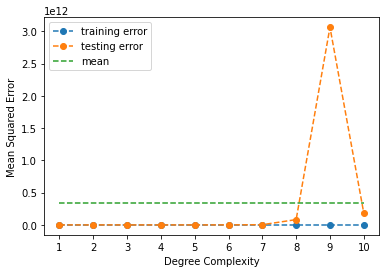

In [16]:
# check effectiveness!
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 11), train_mses, '--o', label = 'training error')
plt.plot(range(1, 11), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 11), [np.mean(test_mses)]*10, '--', label = 'mean')
plt.xticks(range(1, 11), range(1, 11))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend()

### Build base

In [17]:
# Ridge model as base
ridge_model = Ridge(alpha = 0.001).fit(X_train, y_train)
ridge_coefs = ridge_model.coef_
print(f'Ridge Coefs: {np.round(ridge_coefs, 2)}')
ridge_train_mse = mean_squared_error(y_train, ridge_model.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
#print( pd.DataFrame({'feature': X_train.columns, 'coef': ridge_coefs}) )
print('MSE train:', ridge_train_mse)
print('MSE test :', ridge_test_mse)
pd.DataFrame({'feature': X_train.columns, 'coef': ridge_coefs})

Ridge Coefs: [ 0.01 -1.02 -0.13  0.   -1.77  0.01 -0.   -6.63 -0.39  0.81  0.3 ]
MSE train: 0.42747165895913297
MSE test : 0.3884287985448445


,feature,coef
0,fixed acidity,0.012968
1,volatile acidity,-1.015023
2,citric acid,-0.134456
3,residual sugar,0.004764
4,chlorides,-1.768002
5,free sulfur dioxide,0.005098
6,total sulfur dioxide,-0.003682
7,density,-6.627609
8,pH,-0.392152
9,sulphates,0.806944


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

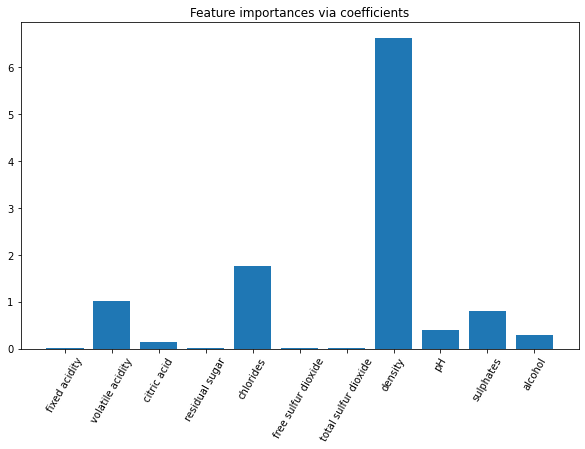

In [18]:
plt.subplots(figsize=(10,6))
plt.bar(height=np.abs(ridge_coefs), x=X_train.columns)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 45-degrees

In [19]:
# Changing amount of regularization from low to high regularization penalties
alphas = [0.001, 0.01, 1.0, 10.0, 100.0, 1000.0]
coef_list = []
train_mses = []
test_mses = []
for a in alphas:
    model = Ridge(alpha=a).fit(X_train, y_train)
    coef_list.append(list(model.coef_))
    train_mses.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, model.predict(X_test)))

# Results
print(len(coef_list))
print('Best alpha:', alphas[test_mses.index(min(test_mses))], 'coefficients:' )
#print('For alpha = 1000, the coefficients:')
list(zip(X_train.columns, coef_list[test_mses.index(min(test_mses))]))

6
Best alpha: 0.001 coefficients:


[('fixed acidity', 0.012967614461134303),
 ('volatile acidity', -1.015022531808877),
 ('citric acid', -0.1344562522844093),
 ('residual sugar', 0.004763618967731509),
 ('chlorides', -1.7680017939806583),
 ('free sulfur dioxide', 0.005098375073761178),
 ('total sulfur dioxide', -0.0036817439427784754),
 ('density', -6.627609080429287),
 ('pH', -0.39215211116573717),
 ('sulphates', 0.8069442506922231),
 ('alcohol', 0.2950092594458866)]

Text(0.5, 1.0, 'Comparing the Coefficients')

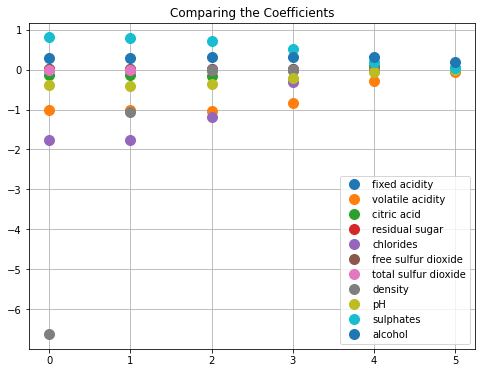

In [20]:
# plot coeffs
plt.subplots(figsize=(8,6))
plt.plot(coef_list, 'o', markersize = 10, label = X_train.columns)
plt.legend()
plt.grid()
plt.title('Comparing the Coefficients')

#### SequentialFeatureSelection using the Lasso to select 4 features

In [21]:
# Lasso by itself
lasso = Lasso()   # default alpha = 1
lasso.fit(X_train, y_train)
print(list(zip(X_train.columns, lasso.coef_)))
lasso_df = pd.DataFrame({'feature': X_train.columns, 'coef': lasso.coef_})
lasso_df.loc[lasso_df['coef'] != 0]

[('fixed acidity', 0.0), ('volatile acidity', -0.0), ('citric acid', 0.0), ('residual sugar', 0.0), ('chlorides', -0.0), ('free sulfur dioxide', 0.0), ('total sulfur dioxide', -0.004238947409537814), ('density', -0.0), ('pH', -0.0), ('sulphates', 0.0), ('alcohol', 0.0)]


,feature,coef
6,total sulfur dioxide,-0.004239


In [22]:
print('LASSO:')
print('MSE train:', mean_squared_error(y_train, lasso.predict(X_train)))
print('MSE test :', mean_squared_error(y_test, lasso.predict(X_test)))

LASSO:
MSE train: 0.6344527033514971
MSE test : 0.6150055162124933


In [23]:
# # SequentialFeatureSelection using the Lasso to select 4 features.
# sfs_forward = SequentialFeatureSelector(
#     estimator=lasso, n_features_to_select=4, direction="forward"
# ).fit(X, y)


In [29]:
# SequentialFeatureSelection using the Lasso to select 4 features.
# forward
sequential_pipe = Pipeline([
#    ('scaler', StandardScaler()),
    ('sfs', SequentialFeatureSelector(n_features_to_select = 4, estimator=Lasso())),
    ('linreg', LinearRegression())
])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
print('SFS with LASSO:')
print('MSE train:', sequential_train_mse)
print('MSE test :', sequential_test_mse)
print('coef:', sequential_pipe[:-1].get_feature_names_out())
sequential_pipe

SFS with LASSO:
MSE train: 0.5477973118099638
MSE test : 0.5027384933740707
coef: ['fixed acidity' 'volatile acidity' 'citric acid' 'total sulfur dioxide']


Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('linreg', LinearRegression())])

In [34]:
#sequential_pipe[:-1]

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4))])

#### RFE using Lasso to select 4 features.

In [39]:
# RFE using Lasso to select 4 features.
rfe_pipe = Pipeline([
#    ('scaler', StandardScaler()),
    ('rfe', RFE(n_features_to_select = 4, estimator=Lasso())),
    ('linreg', LinearRegression())
])
rfe_pipe.fit(X_train, y_train)
rfe_train_mse = mean_squared_error(y_train, rfe_pipe.predict(X_train))
rfe_test_mse = mean_squared_error(y_test, rfe_pipe.predict(X_test))
print('RFE with LASSO:')
print('MSE train:', rfe_train_mse)
print('MSE test :', rfe_test_mse)
print('coefs:', rfe_pipe[:-1].get_feature_names_out())
rfe_pipe

RFE with LASSO:
MSE train: 0.4677700441355884
MSE test : 0.4406456053947725
coefs: ['total sulfur dioxide' 'pH' 'sulphates' 'alcohol']


Pipeline(steps=[('rfe', RFE(estimator=Lasso(), n_features_to_select=4)),
                ('linreg', LinearRegression())])

In [26]:
[ridge_train_mse, sequential_train_mse, rfe_train_mse]

[0.42747165895913297, 0.5477973118099638, 0.4677700441355884]

The Complexity that minimized Test Error was: 1


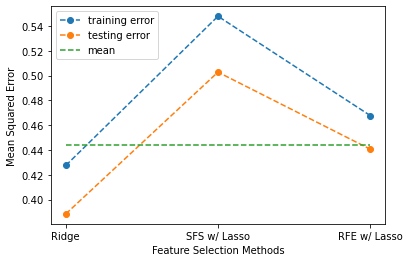

In [27]:
# Compare all 3 results!
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 4), [ridge_train_mse, sequential_train_mse, rfe_train_mse], '--o', label = 'training error')
plt.plot(range(1, 4), [ridge_test_mse, sequential_test_mse, rfe_test_mse], '--o', label = 'testing error')
plt.plot(range(1, 4), [np.mean([ridge_test_mse, sequential_test_mse, rfe_test_mse])]*3, '--', label = 'mean')
plt.xticks(range(1, 4), ['Ridge', 'SFS w/ Lasso', 'RFE w/ Lasso'])
plt.xlabel('Feature Selection Methods')
plt.ylabel('Mean Squared Error')
plt.legend()